In [ ]:
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from pathlib import Path
from params import hmm_parameters_object
from hmm_utils import get_param_string

#load in a .npy file
def load_npy_file(file_path):
    try:
        data = np.load(file_path, allow_pickle=True)
        return data
    except Exception as e:
        print(f"Error loading .npy file: {e}")
        return None
    
# Load in a .pkl file
def load_pkl_file(file_path):
    try:
        with open(file_path, 'rb') as f:
            data = pickle.load(f)
        return data
    except Exception as e:
        print(f"Error loading .pkl file: {e}")
        return None

hmm_base_outpath = Path(hmm_parameters_object.hmm_base_outpath)
mouse_id = hmm_parameters_object.mouse_id
root_path = Path(hmm_parameters_object.root_path)
session_id = hmm_parameters_object.session_id
output_path = hmm_base_outpath
session_path = root_path / "derivatives" / mouse_id / session_id / "behav"

# Path to feature array
# mouse_dir = [home_dir / "sub-004_id-1122876_type-wtshelterswitch",
#                 home_dir / "sub-005_id-1122877_type-wtshelterswitch",
#                 home_dir / "sub-006_id-1123131_type-wtshelterswitch"             
# ]

#single session
param_string = get_param_string(hmm_parameters_object)
print('param_string:', param_string)
home_dir = output_path / mouse_id / param_string
home_dir.mkdir(parents=True, exist_ok=True)
print('param_string:', param_string)

K = hmm_parameters_object.k  # number of hidden states
block_id = hmm_parameters_object.block_id
# "sub-005_id-1122877_type-wtshelterswitch"
# "sub-004_id-1122876_type-wtshelterswitch" 
# "sub-006_id-1123131_type-wtshelterswitch" 
# session_id = "sub-005_id-1122877_type-wtshelterswitch"


print(home_dir)
states_file = home_dir / f"states_K={K}_{param_string}.npy"
print('states_file:', states_file)
states = load_npy_file(states_file)

# analysis_file_path = home_dir / "hmm_analysis_results.pkl"
# analysis_file = load_pkl_file(analysis_file_path)


# means = analysis_file['model_parameters']['means']
# print('means shape:', means.shape)
# print('means:', means)
# K = analysis_file['model_parameters']['K']
# print('k:', K)

# plt.figure(figsize=(12, 6))
# df = pd.DataFrame(means.T, columns=[f"state_{k}" for k in range(K)])
# df.plot.bar()
# plt.title("Feature means per HMM state")
# plt.ylabel("Feature value")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

# print("Loaded analysis results from:", analysis_file_path)
# print("Analysis results:", analysis_file)

print("Loaded states from:", states_file)


print("States loaded:", states)
print("Number of states:", len(states))
print('shape of states:', states.shape)
print('all unique states:', np.unique(states) if isinstance(states, np.ndarray) else 'N/A')


unique, counts = np.unique(states, return_counts=True)
plt.bar(unique, counts)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('State Distribution')
plt.savefig(home_dir / f"state_distribution_plot_K={K}_{param_string}.png")
plt.show()


plt.figure(figsize=(15, 3))
plt.plot(states, drawstyle='steps-post')
plt.xlabel('Time index')
plt.ylabel('State')
plt.title('State sequence over time')
plt.yticks(unique)
plt.savefig(home_dir / f"state_sequence_plot_K={K}_{param_string}.png")
plt.show()



from itertools import groupby

state_durations = []
state_labels = []

for state, group in groupby(states):
    length = len(list(group))
    state_labels.append(state)
    state_durations.append(length)

# Convert to numpy arrays for easier plotting/analysis
state_labels = np.array(state_labels)
state_durations = np.array(state_durations)

plt.figure(figsize=(10,5))
for st in np.unique(state_labels):
    durations = state_durations[state_labels == st]
    plt.hist(durations, bins=30, alpha=0.5, label=f'State {st}')
plt.xlabel('Dwell time (number of consecutive frames)')
plt.ylabel('Frequency')
plt.title('Dwell time distribution per state')
plt.legend()
plt.savefig(home_dir / f"dwell_time_distribution_plot_K={K}_{param_string}.png")
plt.show()



num_states = len(unique)
transitions = np.zeros((num_states, num_states), dtype=int)

for (s1, s2) in zip(states[:-1], states[1:]):
    transitions[s1, s2] += 1

# Normalize rows to get probabilities
trans_probs = transitions / transitions.sum(axis=1, keepdims=True)

plt.figure(figsize=(8,6))
plt.imshow(trans_probs, cmap='viridis', interpolation='none')
plt.colorbar(label='Transition Probability')
plt.xlabel('Next state')
plt.ylabel('Current state')
plt.title('Empirical State Transition Matrix')
plt.savefig(home_dir / f"transition_matrix_plot_K={K}_{param_string}.png")
plt.show()




param_string: block0_N=5_pairwise_speed_accel_disbod_dishead
param_string: block0_N=5_pairwise_speed_accel_disbod_dishead
O:\slenzi\raphe\behaviour_model\other\hmm_data\sub-005_id-1122877_type-wtshelterswitch\block0_N=5_pairwise_speed_accel_disbod_dishead
states_file: O:\slenzi\raphe\behaviour_model\other\hmm_data\sub-005_id-1122877_type-wtshelterswitch\block0_N=5_pairwise_speed_accel_disbod_dishead\states_K=8_block0_N=5_pairwise_speed_accel_disbod_dishead.npy
Error loading .npy file: [Errno 2] No such file or directory: 'O:\\slenzi\\raphe\\behaviour_model\\other\\hmm_data\\sub-005_id-1122877_type-wtshelterswitch\\block0_N=5_pairwise_speed_accel_disbod_dishead\\states_K=8_block0_N=5_pairwise_speed_accel_disbod_dishead.npy'
Loaded states from: O:\slenzi\raphe\behaviour_model\other\hmm_data\sub-005_id-1122877_type-wtshelterswitch\block0_N=5_pairwise_speed_accel_disbod_dishead\states_K=8_block0_N=5_pairwise_speed_accel_disbod_dishead.npy
States loaded: None


TypeError: object of type 'NoneType' has no len()

 path to the save pont: O:\slenzi\raphe\behaviour_model\derivatives\sub-005_id-1122877_type-wtshelterswitch\ses-001_type-shelterswitch_condition-wtcontrol_datetime-20250412T122632\behav


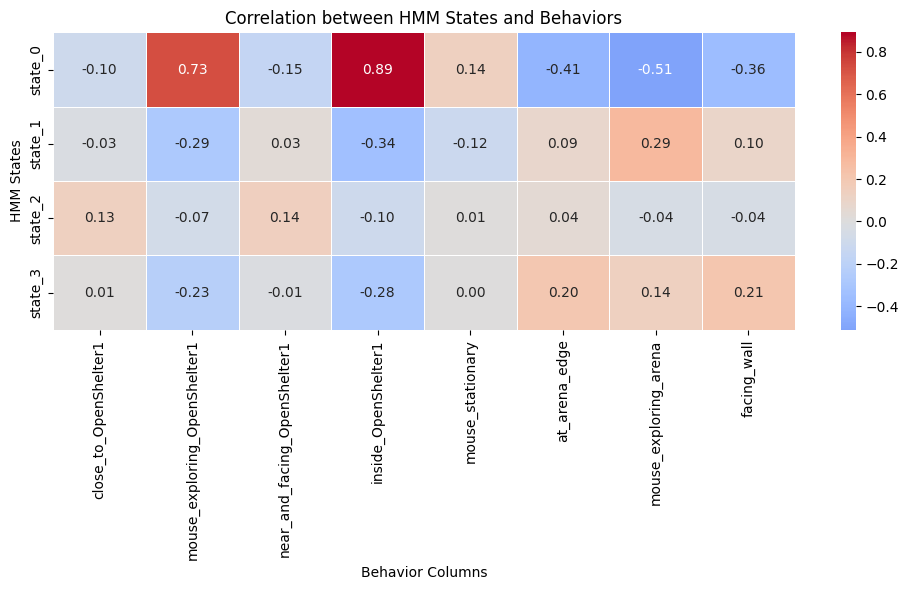

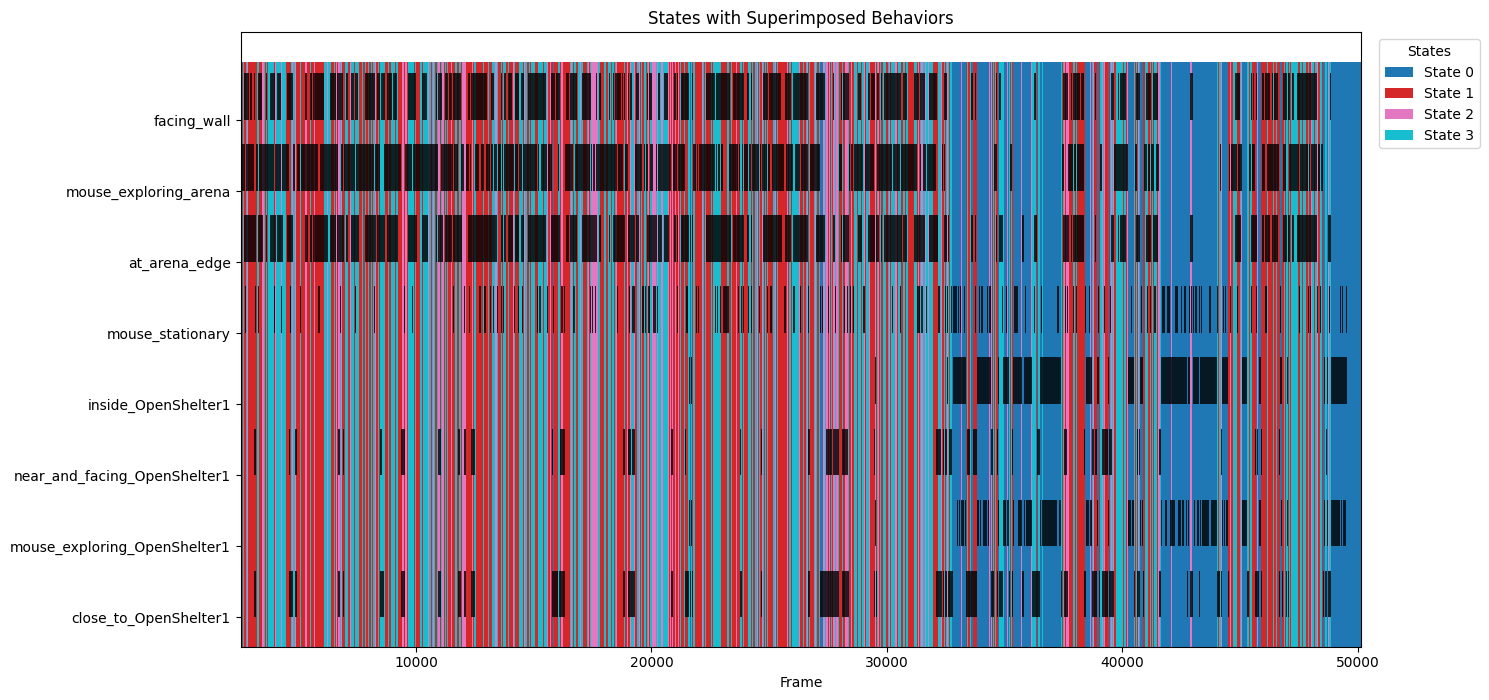

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors
import seaborn as sns


def plot_states_with_superimposed_behaviors(shelter_cat_data_path, start_idx, end_idx, behavior_columns, state_column='states'):
    # Slice data
    df = pd.read_csv(shelter_cat_data_path)
    data = df.iloc[start_idx:end_idx].copy()
    time = np.arange(start_idx, end_idx)

    # Prepare states
    states = data[state_column].fillna(-1).astype(int)
    unique_states = np.unique(states[states >= 0])
    cmap = plt.get_cmap('tab10' if len(unique_states) <= 10 else 'tab20')
    norm = mcolors.Normalize(vmin=unique_states.min(), vmax=unique_states.max())

    n_behaviors = len(behavior_columns)
    fig, ax = plt.subplots(figsize=(15, 0.7 * n_behaviors + 1.5))

    # Plot background colored bars for states (row 0)
    for val in unique_states:
        mask = (states == val)
        ax.bar(time[mask], height=1, width=1, bottom=0, 
               color=cmap(norm(val)), align='edge', label=f'State {val}')

    # Plot translucent behavior overlays on separate y levels
    alpha = 0.8  # Darker black
    y_offsets = np.linspace(0.05, 0.9, n_behaviors)

    for i, col in enumerate(behavior_columns):
        behavior = data[col].fillna(0).astype(int)
        mask = (behavior == 1)
        ax.bar(time[mask], height=0.08, width=1, bottom=y_offsets[i], 
               color='black', alpha=alpha, align='edge')

    # Y-axis labeling for behavior names
    ax.set_yticks(y_offsets)
    ax.set_yticklabels(behavior_columns)
    
    # Formatting
    ax.set_xlim(start_idx, end_idx)
    ax.set_ylim(0, 1.05)
    ax.set_xlabel('Frame')
    ax.set_title('States with Superimposed Behaviors')
    
    # Only show legend for states
    handles, labels = ax.get_legend_handles_labels()
    state_handles = handles[-len(unique_states):]  # Keep only state bars
    state_labels = labels[-len(unique_states):]
    ax.legend(state_handles, state_labels, bbox_to_anchor=(1.01, 1), loc='upper left', title='States')
    
    plt.tight_layout()
    # save the plot
    plt.savefig(home_dir / f"states_with_behaviors_plot_K={K}_{param_string}.png", dpi=300)
    plt.show()


shelter_cat_data_path = session_path / "session_behav_data.csv"
shelter_cat_data = pd.read_csv(shelter_cat_data_path)

behaviour_columns = ['close_to_OpenShelter1', 'mouse_exploring_OpenShelter1', 'near_and_facing_OpenShelter1', 
                      'inside_OpenShelter1', 'mouse_stationary', 'at_arena_edge',
                      'mouse_exploring_arena', 'facing_wall']

print(' path to the save pont:', shelter_cat_data_path.parent)




# === Step 1: Drop rows where 'states' is NaN ===
df = shelter_cat_data.dropna(subset=['states']).copy()
df['states'] = df['states'].astype(int)

# === Step 2: Select only behavior columns ===
# You may customize this if needed
behavior_columns = behaviour_columns

# Optional: Ensure numeric
df[behavior_columns] = df[behavior_columns].apply(pd.to_numeric, errors='coerce')

# === Step 3: One-hot encode HMM states ===
state_dummies = pd.get_dummies(df['states'], prefix='state')

# === Step 4: Combine and compute correlations ===
combined = pd.concat([df[behavior_columns], state_dummies], axis=1)
correlation_matrix = combined.corr()

# === Step 5: Extract correlation between states and behaviors ===
state_behavior_corr = correlation_matrix.loc[state_dummies.columns, behavior_columns]

# === Step 6: Plot heatmap ===
plt.figure(figsize=(10, 6))
sns.heatmap(state_behavior_corr, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
plt.title("Correlation between HMM States and Behaviors")
plt.xlabel("Behavior Columns")
plt.ylabel("HMM States")
plt.tight_layout()
plt.savefig(home_dir / f"state_behavior_correlation_heatmap_K={K}_{param_string}.png", dpi=300)
plt.show()



# Find the indices where states are NOT NaN
valid_state_mask = ~shelter_cat_data['states'].isna()
# Get the first and last valid indices
start_idx = valid_state_mask[valid_state_mask].index[0]
end_idx = valid_state_mask[valid_state_mask].index[-1] + 1  # +1 to make it exclusive

plot_states_with_superimposed_behaviors(
    shelter_cat_data_path=shelter_cat_data_path,
    start_idx=start_idx,
    end_idx=end_idx,
    behavior_columns=behaviour_columns
)


In [ ]:
from animations_utils import VideoAnnotator

shelter_cat_data_path = session_path / "session_behav_data.csv"

video_path = Path(str(shelter_cat_data_path.parent).replace("derivatives", "rawdata"))
video_path = video_path / "cam.avi"

video_dir = video_path.parent
if 'other' in str(video_path):
    derivatives_path = Path(video_dir)
else:
    derivatives_path = Path(*[("derivatives" if part == "rawdata" else part) for part in video_dir.parts])

list_of_blocks_data_path = derivatives_path / 'list_of_blocks_data.pkl'

start_frame = 31000
end_frame = 37000

# Initialize the annotator
annotator = VideoAnnotator()

# 1. Keypoints only 
# annotator.create_keypoint_video_clip(
#     dataset=ds,
#     video_path=video_path,
#     output_path=derivatives_path / 'keypoint_annotated_clip.mp4',
#     start_frame=start_frame,
#     end_frame=end_frame,
# )

# 2. Behavioral annotations only
annotator.create_behavioral_video_clip(
    csv_path=shelter_cat_data_path,
    video_path=video_path, 
    output_path=home_dir / f"behavior_only_K={K}_{param_string}.mp4",
    start_frame=start_frame,
    end_frame=end_frame,
    list_of_blocks_data_path=list_of_blocks_data_path
)

# 3. Both together
# annotator.create_combined_video_clip(
#     video_path=video_path,
#     output_path=derivatives_path / "behav_keypoint_clip.mp4",
#     # Keypoint parameters
#     dataset=ds,
#     show_confidence=True,
#     # Behavioral parameters  
#     csv_path=csv_file,
#     list_of_blocks_data_path=list_of_blocks_data_path,
#     start_frame=start_frame,
#     end_frame=end_frame,
# )

Processing frame 31000/37000
Processing frame 31100/37000
Processing frame 31200/37000
Processing frame 31300/37000
Processing frame 31400/37000
Processing frame 31500/37000
Processing frame 31600/37000
Processing frame 31700/37000
Processing frame 31800/37000
Processing frame 31900/37000
Processing frame 32000/37000
Processing frame 32100/37000
Processing frame 32200/37000
Processing frame 32300/37000
Processing frame 32400/37000
Processing frame 32500/37000
Processing frame 32600/37000
Processing frame 32700/37000
Processing frame 32800/37000
Processing frame 32900/37000
Processing frame 33000/37000
Processing frame 33100/37000
Processing frame 33200/37000
Processing frame 33300/37000
Processing frame 33400/37000
Processing frame 33500/37000
Processing frame 33600/37000
Processing frame 33700/37000
Processing frame 33800/37000
Processing frame 33900/37000
Processing frame 34000/37000
Processing frame 34100/37000
Processing frame 34200/37000
Processing frame 34300/37000
Processing fra

WindowsPath('O:/slenzi/raphe/behaviour_model/other/hmm_data/sub-005_id-1122877_type-wtshelterswitch/block0_pairwise_accel/behavior_only_K=4_block0_pairwise_accel.mp4')

Saved CSV for trained=sub-005_id-1122877_type-wtshelterswitch, comparison=sub-006_id-1123131_type-wtshelterswitch → O:\slenzi\raphe\behaviour_model\other\hmm_data\sub-005_id-1122877_type-wtshelterswitch\block0_N=8_pairwise_speed_accel_disbod_disrim\log_likelihoods_combined_block0_N=8_pairwise_speed_accel_disbod_disrim_trained-sub-005_comparison-sub-006.csv


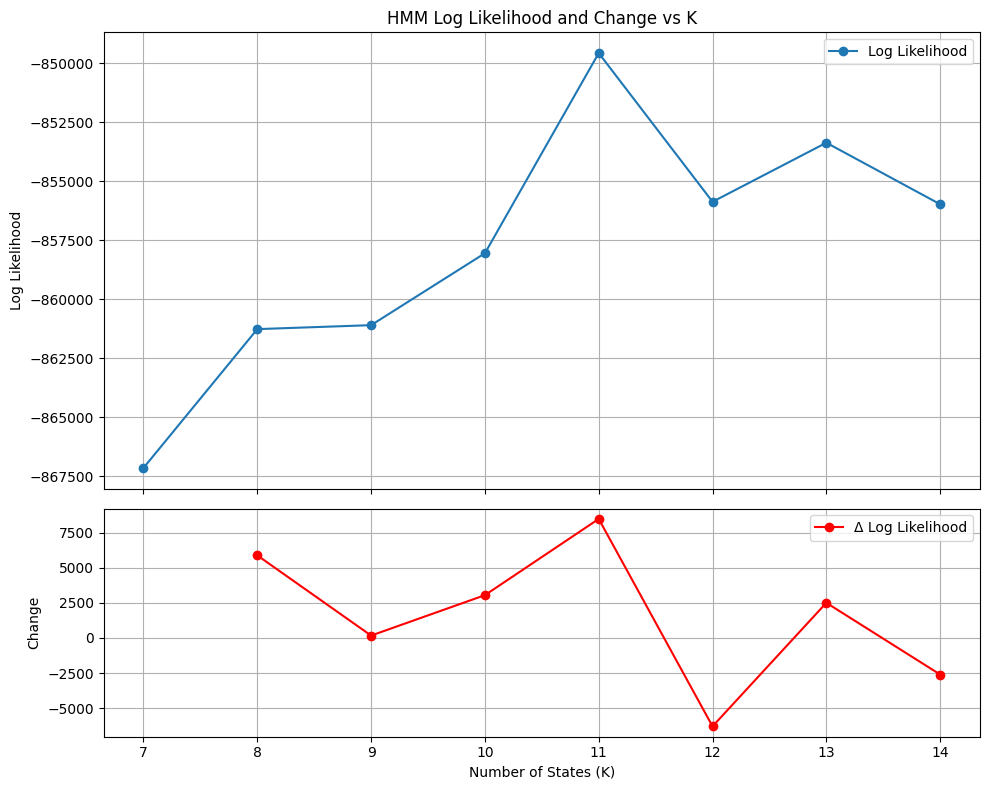

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt


def combine_log_likelihoods(folder_path):
    results = []
    param_strings = set()

    # Search all CSV files starting with log_likelihood_summary
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.startswith("log_likelihood_summary") and file.endswith(".csv"):
                file_path = os.path.join(root, file)
                df = pd.read_csv(file_path)

                df = df.dropna(how='all')
                if df.empty:
                    continue

                # Keep only relevant columns
                if not all(col in df.columns for col in [
                    "log_likelihood", "log_likelihood_per_point", "n_points",
                    "K", "param_string", "trained_session", "comparison_session"
                ]):
                    raise ValueError(f"Missing required columns in {file_path}")

                param_strings.update(df["param_string"].unique())

                # Append all rows
                results.extend(df.to_dict(orient="records"))

    if len(param_strings) != 1:
        raise ValueError(f"Inconsistent param_string values found: {param_strings}")

    # Convert to DataFrame
    all_df = pd.DataFrame(results)

    # Group by trained_session & comparison_session
    grouped = all_df.groupby(["trained_session", "comparison_session"], sort=False)

    save_paths = []
    param_string = list(param_strings)[0]

    for (trained, comparison), group_df in grouped:
        group_df = group_df.sort_values(by="K")
        trained_short = str(trained)[:7]
        comparison_short = str(comparison)[:7]

        save_name = f"log_likelihoods_combined_{param_string}_trained-{trained_short}_comparison-{comparison_short}.csv"
        save_path = os.path.join(folder_path, save_name)

        group_df.to_csv(save_path, index=False)
        save_paths.append(save_path)
        print(f"Saved CSV for trained={trained}, comparison={comparison} → {save_path}")

    return save_paths, trained, comparison


def plot_log_likelihoods(folder_path, metric="log_likelihood", trained=None, comparison=None):
    """
    Plot HMM log likelihood metrics for different K values with a
    combined figure showing both the metric and its change.

    Parameters
    ----------
    folder_path : str
        Path to the folder containing the combined CSV.
    metric : str
        Either 'log_likelihood' or 'log_likelihood_per_point'.
    """
    if metric not in ["log_likelihood", "log_likelihood_per_point"]:
        raise ValueError("metric must be 'log_likelihood' or 'log_likelihood_per_point'")

    # Find the combined CSV
    combined_files = [f for f in os.listdir(folder_path)
                      if f.startswith("log_likelihoods_combined") and f.endswith(".csv")]
    if not combined_files:
        raise FileNotFoundError("No combined log likelihood CSV found in the given folder.")

    combined_path = os.path.join(folder_path, combined_files[0])
    df = pd.read_csv(combined_path)

    K = df["K"]
    y = df[metric]
    delta_y = y.diff()

    # Combined plot
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True,
                                   gridspec_kw={'height_ratios': [2, 1]})

    # Top: main metric
    ax1.plot(K, y, marker='o', label=metric.replace("_", " ").title())
    ax1.set_ylabel(metric.replace("_", " ").title())
    ax1.set_title(f"HMM {metric.replace('_', ' ').title()} and Change vs K")
    ax1.grid(True)
    ax1.legend()

    # Bottom: delta metric
    ax2.plot(K, delta_y, marker='o', color="red",
             label=f"Δ {metric.replace('_', ' ').title()}")
    ax2.set_xlabel("Number of States (K)")
    ax2.set_ylabel("Change")
    ax2.grid(True)
    ax2.legend()
    if trained and comparison:
        trained_short = str(trained)[:7]
        comparison_short = str(comparison)[:7]
        # save
        plt.savefig(os.path.join(folder_path, f"hmm_log_likelihood_plot_trained-{trained_short}_comparison-{comparison_short}.png"))
    plt.tight_layout()
    plt.show()


folder_path = r"O:\slenzi\raphe\behaviour_model\other\hmm_data\sub-005_id-1122877_type-wtshelterswitch\block0_N=8_pairwise_speed_accel_disbod_disrim"

save_paths, trained, comparison = combine_log_likelihoods(folder_path)
plot_log_likelihoods(folder_path, metric="log_likelihood", trained=trained, comparison=comparison)
# plot_log_likelihoods(folder_path, metric="log_likelihood_per_point", trained=trained, comparison=comparison)

<xarray.Dataset> Size: 17MB
Dimensions:       (time: 90798, space: 2, keypoints: 13, individuals: 1,
                   frame: 90798)
Coordinates:
  * time          (time) float64 726kB 0.0 0.025 0.05 ... 2.27e+03 2.27e+03
  * space         (space) <U1 8B 'x' 'y'
  * keypoints     (keypoints) <U11 572B 'Nose' 'Head Centre' ... 'Tail Tip'
  * individuals   (individuals) <U12 48B 'individual_0'
Dimensions without coordinates: frame
Data variables:
    position      (time, space, keypoints, individuals) float32 9MB ...
    confidence    (time, keypoints, individuals) float32 5MB ...
    velocity      (time, space, individuals) float32 726kB ...
    speed         (time, individuals) float32 363kB ...
    acceleration  (time, space, individuals) float32 726kB ...
    states        (frame) float64 726kB ...
Attributes:
    source_software:  SLEAP
    ds_type:          poses
    fps:              40.0
    time_unit:        seconds
    source_file:      O:/slenzi/raphe/behaviour_model/derivati